### LASSO回归 (Least Absolute Shrinkage and Selection Operator Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [3]:
x = x[y<50]
x = x[:,12]
y = y[y<50]
x.shape, y.shape

((490,), (490,))

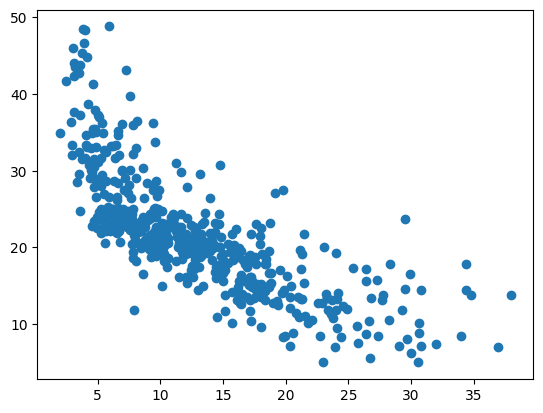

In [4]:
plt.scatter(x,y)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1,1),y,random_state=666)

In [6]:
x_train.shape, y_train.shape

((367, 1), (367,))

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [8]:
def PolynomialRegression(degree):
    return Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
    ])

In [9]:
poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(x_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
y_predict = poly_reg.predict(x_test)

In [12]:
mean_squared_error(y_test, y_predict)

934109.3728467254

In [13]:
def show_plot(model):
    plt.scatter(x,y)
    x_plot = np.linspace(0, 40 ,100).reshape(100, 1)
    y_plot = model.predict(x_plot)
    plt.plot(x_plot, y_plot, color='red')
    plt.axis([0, 40, 0, 50])
    plt.show

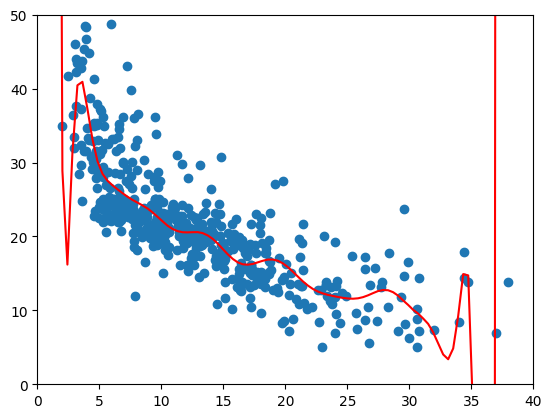

In [14]:
show_plot(poly_reg)

In [15]:
from sklearn.linear_model import Lasso
def LassoRegression(degree, alpha):
    return Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', Lasso(alpha=alpha))
    ])

In [16]:
lasso_reg = LassoRegression(20, 0.0001)
lasso_reg.fit(x_train, y_train)
y_predict = lasso_reg.predict(x_test)
mean_squared_error(y_test, y_predict)

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.523e+03, tolerance: 2.220e+00
  model = cd_fast.enet_coordinate_descent(


24.267811777669948

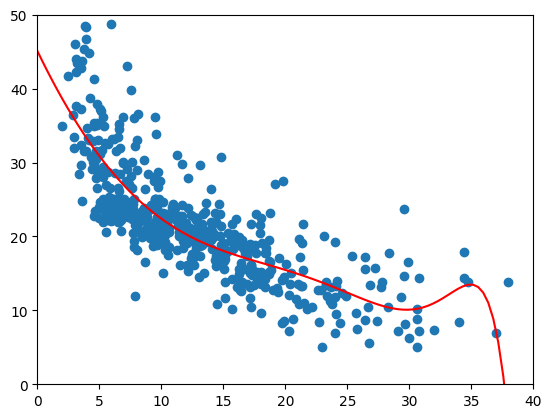

In [17]:
show_plot(lasso_reg)

In [18]:
lasso_reg = LassoRegression(20, 0.1)
lasso_reg.fit(x_train, y_train)
y_predict = lasso_reg.predict(x_test)
mean_squared_error(y_test, y_predict)

22.487107446393836

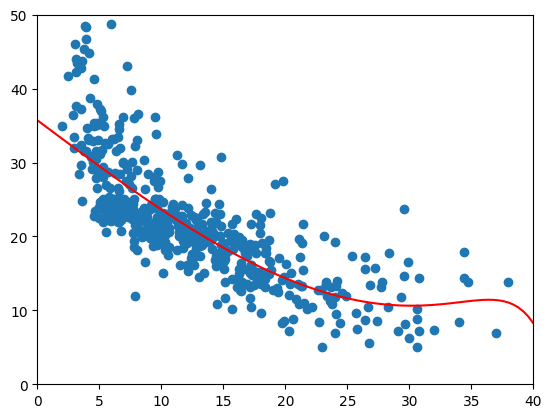

In [19]:
show_plot(lasso_reg)

### 岭回归

In [20]:
from sklearn.linear_model import Ridge
def RidgeRegression(degree, alpha):
    return Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', Ridge(alpha=alpha))
    ])

In [21]:
ridge_reg = RidgeRegression(20, 0.0001)
ridge_reg.fit(x_train, y_train)
y_predict = ridge_reg.predict(x_test)
mean_squared_error(y_test, y_predict)

45.68106844106401

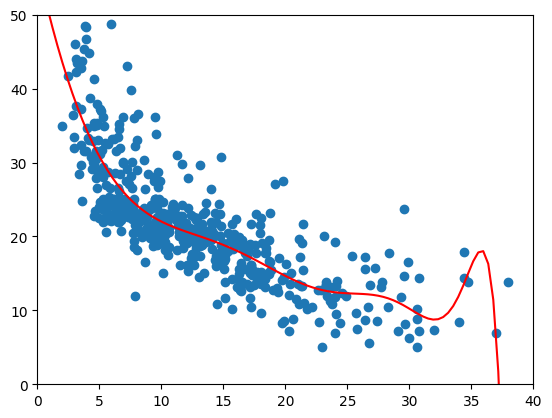

In [22]:
show_plot(ridge_reg)

In [23]:
ridge_reg = RidgeRegression(20, 1)
ridge_reg.fit(x_train, y_train)
y_predict = ridge_reg.predict(x_test)
mean_squared_error(y_test, y_predict)

23.518359442385805

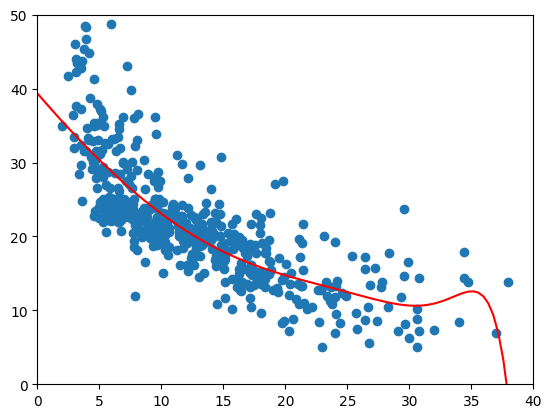

In [24]:
show_plot(ridge_reg)

In [25]:
ridge_reg = RidgeRegression(20, 100)
ridge_reg.fit(x_train, y_train)
y_predict = ridge_reg.predict(x_test)
mean_squared_error(y_test, y_predict)

28.488607370708692

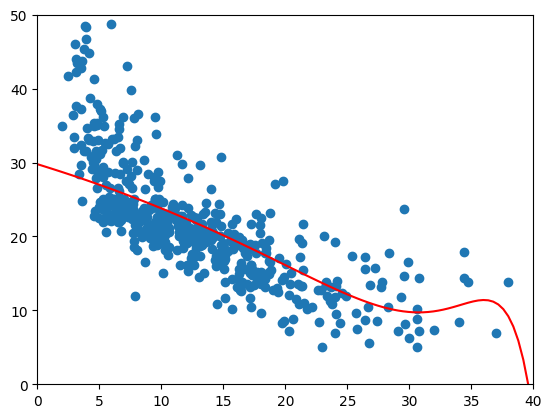

In [26]:
show_plot(ridge_reg)